# Megatutorial 3: Klassifikation von Daten

In [1]:
from pandas import read_csv

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, precision_score, classification_report

from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

## Daten laden

In [2]:
data = read_csv(
    "../../data/fake_profiles.csv",
    sep=",",
    decimal="."
)

## Data Preprocessing


In [3]:
data.dropna(inplace=True)

In [4]:
feature = [
    'profile_pic', 'rel_num_numeric_char_username',
    'words_fullname', 'rel_num_numeric_char_fullname', 'name=username',
    'description_length', 'has_external_url', 'is_private'
]

target = ['is_fake']

In [5]:
X = data[feature]
y = data[target]

In [6]:
yes_no_encoder = LabelEncoder()

X.loc[:, "name=username"] = yes_no_encoder.fit_transform(X["name=username"])
X.loc[:, "profile_pic"] = yes_no_encoder.fit_transform(X["profile_pic"])
X.loc[:, "has_external_url"] = yes_no_encoder.fit_transform(X["has_external_url"])
X.loc[:, "is_private"] = yes_no_encoder.fit_transform(X["is_private"])

## Decision Tree Machine Learning Model

In [7]:
tree_model = DecisionTreeClassifier(max_depth=5)

In [8]:
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [9]:
predicitons = tree_model.predict(X)

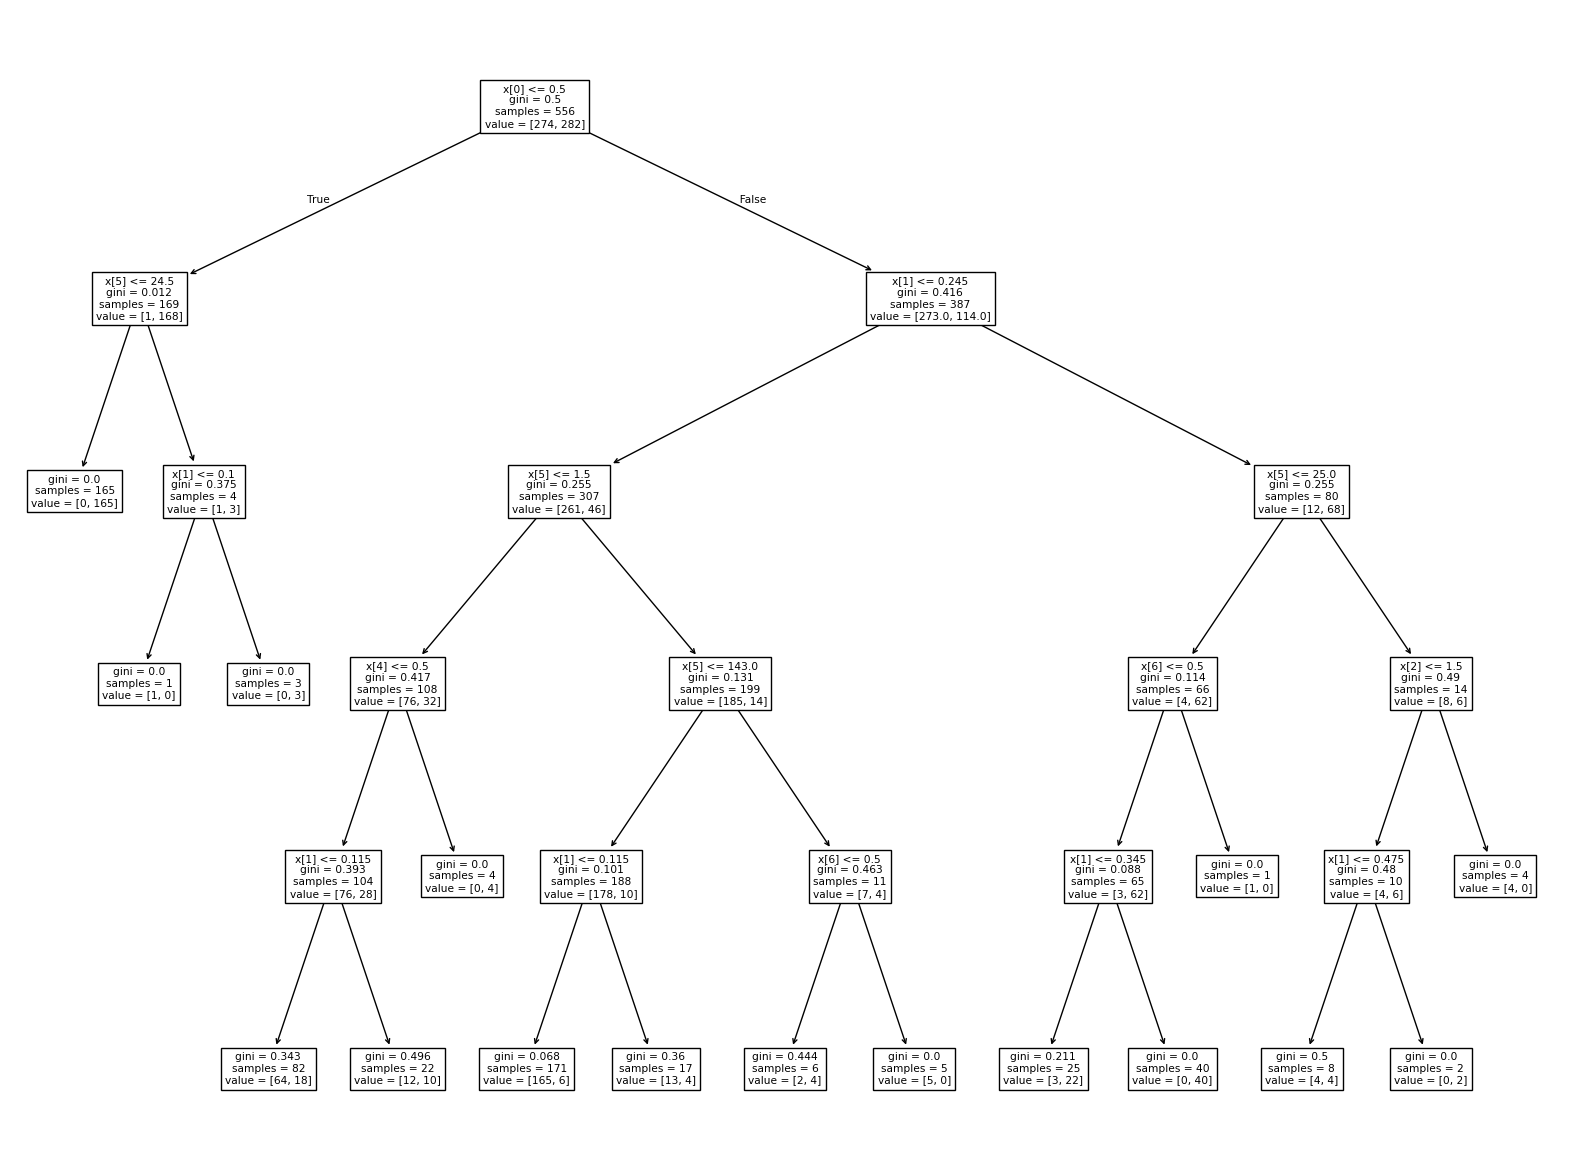

In [10]:
plt.figure(figsize=(20,15))
plot_tree(tree_model)
plt.show()

In [11]:
data["predictions"] = predicitons

In [12]:
data

,Unnamed: 0,profile_pic,rel_num_numeric_char_username,words_fullname,rel_num_numeric_char_fullname,name=username,description_length,has_external_url,is_private,num_posts,num_followers,num_follows,is_fake,predictions
0,0,yes,0.27,0,0.00,no,53,no,no,32,1000.0,955,no,no
1,1,yes,0.00,2,0.00,no,44,no,no,286,2740.0,533,no,no
2,2,yes,0.10,2,0.00,no,0,no,yes,13,159.0,98,no,no
3,3,yes,0.00,1,0.00,no,82,no,no,679,414.0,651,no,no
4,4,yes,0.00,2,0.00,no,0,no,yes,6,151.0,126,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,570,yes,0.20,1,0.00,no,28,no,no,0,15.0,64,yes,no
572,572,yes,0.38,1,0.33,no,21,no,no,44,66.0,75,yes,yes
573,573,yes,0.57,2,0.00,no,0,no,no,4,96.0,339,yes,yes
574,574,yes,0.57,1,0.00,no,11,no,no,0,57.0,73,yes,yes


## Evaluation

In [13]:
confusion_matrix(y, predicitons)

array([[269,   5],
       [ 42, 240]])

In [14]:
print(classification_report(y, predicitons))

              precision    recall  f1-score   support

          no       0.86      0.98      0.92       274
         yes       0.98      0.85      0.91       282

    accuracy                           0.92       556
   macro avg       0.92      0.92      0.92       556
weighted avg       0.92      0.92      0.92       556



## K Nearest Neighbor Machine Learning Model

In [15]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn_model.fit(X, y)

c:\Python\Python313\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [17]:
knn_model.predict(X)

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no',

In [18]:
print(classification_report(y, knn_model.predict(X)))

              precision    recall  f1-score   support

          no       0.85      0.97      0.91       274
         yes       0.96      0.84      0.90       282

    accuracy                           0.90       556
   macro avg       0.91      0.90      0.90       556
weighted avg       0.91      0.90      0.90       556



In [19]:
knn_model.score(X, y)

0.9010791366906474

In [20]:
tree_model.score(X, y)

0.9154676258992805